- Plotted the frequency distribution of POS trigrams in both Formal and Informal sentences
- Also plotted the cumulative frequency of these trigrams
- Noted differences in "VERB - PRONOUN -NOUN" trigrams

In [1]:
def read_text(file_path):

    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()

    for i in range(len(lines)):
        lines[i]=lines[i].strip()

    return lines

In [2]:
sf= read_text("formal.txt")
sif = read_text("informal.txt")

In [3]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("en_core_web_lg")

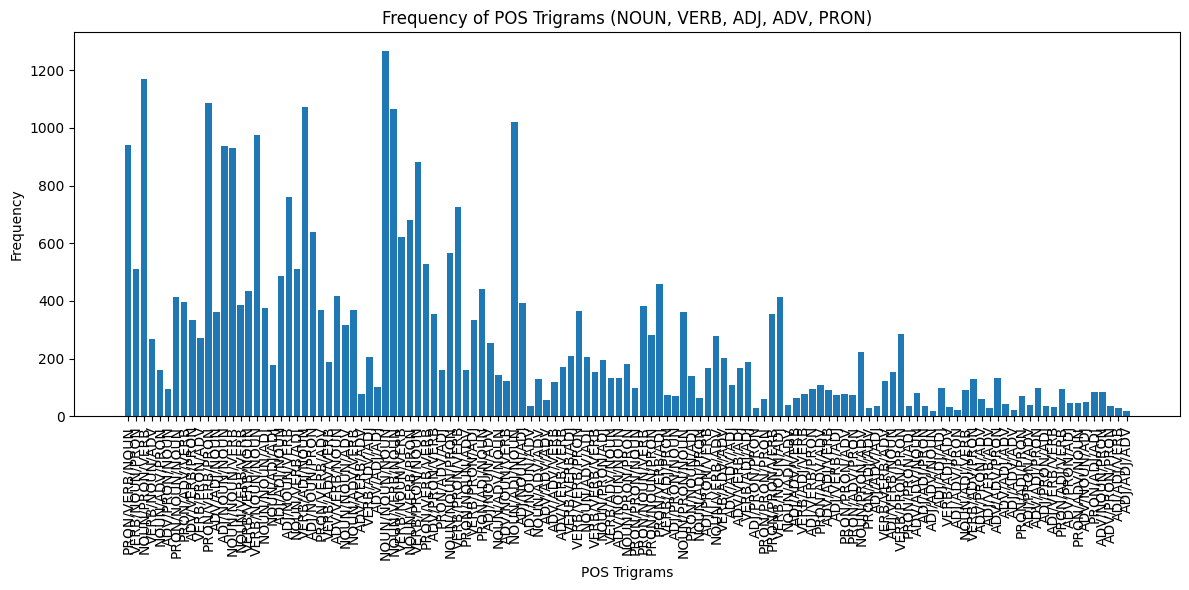

In [8]:
# Tokenize and tag the sentences, and extract POS tags (only consider the first 5)
pos_trigrams = []

for sentence in sf:
    doc = nlp(sentence)
    pos_tags = [token.pos_ for token in doc]
    # Filter to keep only the first 5 POS tags (NOUN, VERB, ADJ, ADV, PRON)
    pos_tags = [tag for tag in pos_tags if tag in ('NOUN', 'VERB', 'ADJ', 'ADV', 'PRON')]
    trigrams = [(pos_tags[i], pos_tags[i + 1], pos_tags[i + 2]) for i in range(len(pos_tags) - 2)]
    pos_trigrams.extend(trigrams)

# Count the frequency of trigrams
trigram_counts = Counter(pos_trigrams)

# Plot the histogram
trigram_labels, trigram_freqs = zip(*trigram_counts.items())
plt.figure(figsize=(12, 6))
plt.bar(range(len(trigram_labels)), trigram_freqs)
plt.xticks(range(len(trigram_labels)), ["/".join(trigram) for trigram in trigram_labels], rotation=90
)
plt.xlabel("POS Trigrams")
plt.ylabel("Frequency")
plt.title("Frequency of POS Trigrams (NOUN, VERB, ADJ, ADV, PRON)")
plt.tight_layout()
plt.show()

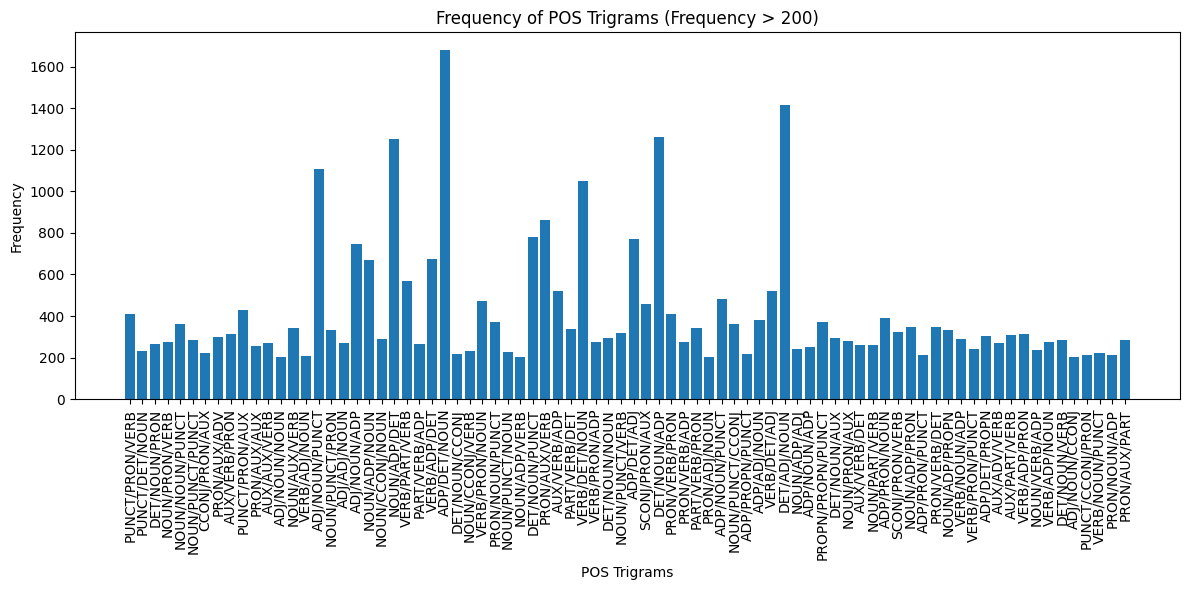

In [9]:
pos_trigrams = []

for sentence in sf:
    doc = nlp(sentence)
    pos_tags = [token.pos_ for token in doc]
    trigrams = [(pos_tags[i], pos_tags[i + 1], pos_tags[i + 2]) for i in range(len(pos_tags) - 2)]
    pos_trigrams.extend(trigrams)

# Count the frequency of trigrams
trigram_counts = Counter(pos_trigrams)

# Filter trigrams with frequency more than 100
filtered_trigram_counts = {trigram: count for trigram, count in trigram_counts.items() if count > 200}

# Plot the histogram for filtered trigrams
filtered_trigram_labels, filtered_trigram_freqs = zip(*filtered_trigram_counts.items())
plt.figure(figsize=(12, 6))
plt.bar(range(len(filtered_trigram_labels)), filtered_trigram_freqs)
plt.xticks(range(len(filtered_trigram_labels)), ["/".join(trigram) for trigram in filtered_trigram_labels], rotation=90)
plt.xlabel("POS Trigrams")
plt.ylabel("Frequency")
plt.title("Frequency of POS Trigrams (Frequency > 200)")
plt.tight_layout()
plt.show()

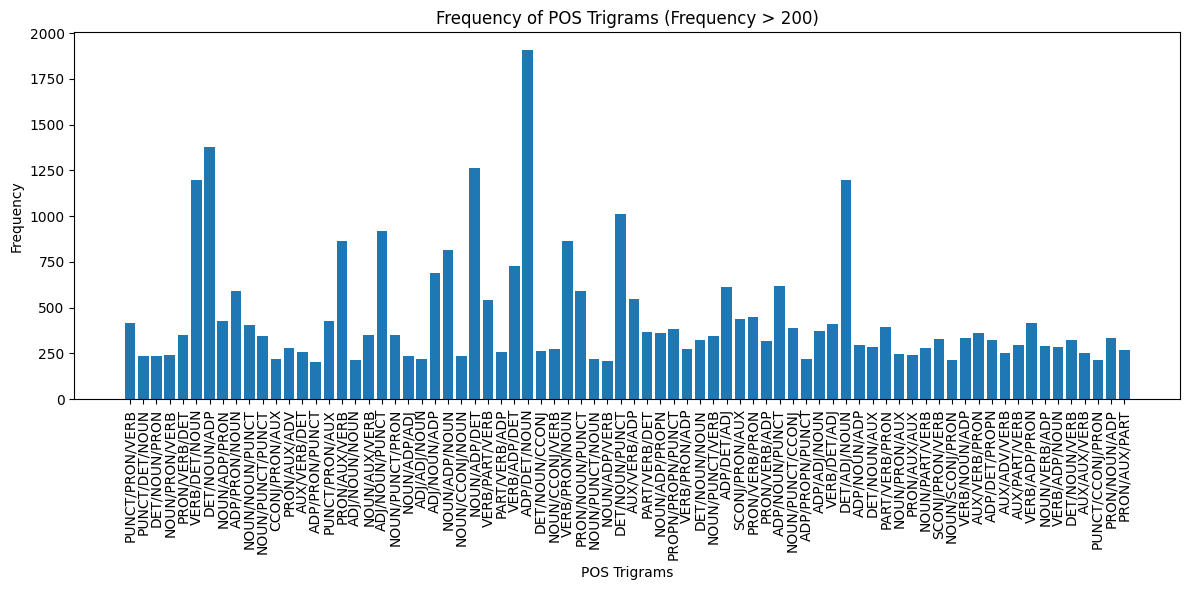

In [10]:
pos_trigrams = []

for sentence in sif:
    doc = nlp(sentence)
    pos_tags = [token.pos_ for token in doc]
    trigrams = [(pos_tags[i], pos_tags[i + 1], pos_tags[i + 2]) for i in range(len(pos_tags) - 2)]
    pos_trigrams.extend(trigrams)

# Count the frequency of trigrams
trigram_counts = Counter(pos_trigrams)

# Filter trigrams with frequency more than 100
filtered_trigram_counts = {trigram: count for trigram, count in trigram_counts.items() if count > 200}

# Plot the histogram for filtered trigrams
filtered_trigram_labels, filtered_trigram_freqs = zip(*filtered_trigram_counts.items())
plt.figure(figsize=(12, 6))
plt.bar(range(len(filtered_trigram_labels)), filtered_trigram_freqs)
plt.xticks(range(len(filtered_trigram_labels)), ["/".join(trigram) for trigram in filtered_trigram_labels], rotation=90)
plt.xlabel("POS Trigrams")
plt.ylabel("Frequency")
plt.title("Frequency of POS Trigrams (Frequency > 200)")
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

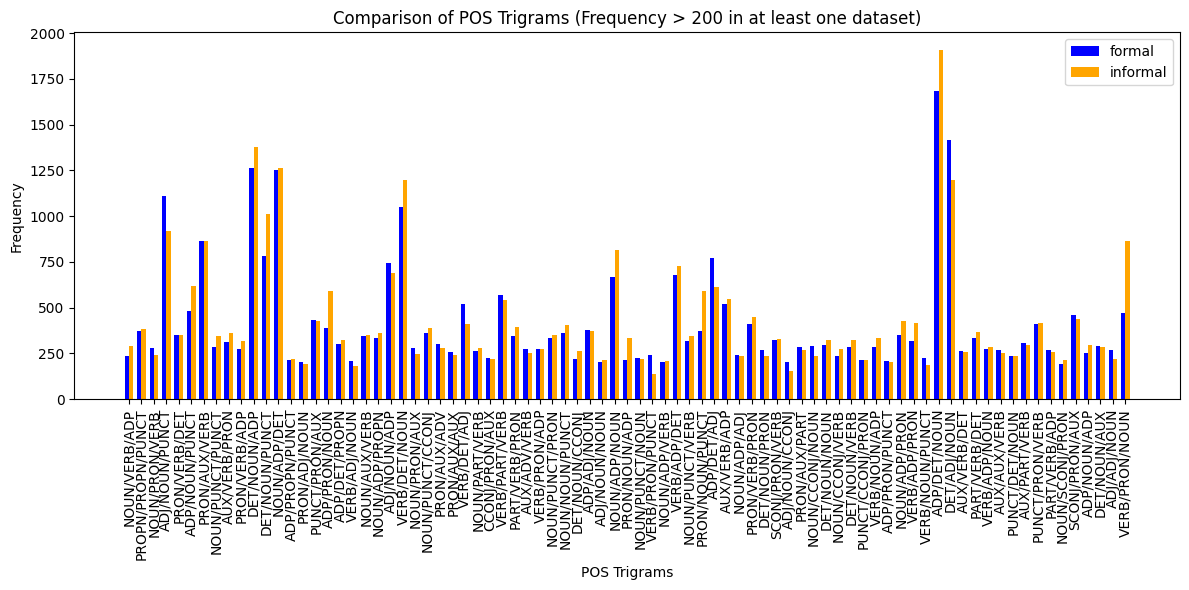

In [5]:
def extract_trigrams(sentences):
    trigrams = []
    for sentence in sentences:
        doc = nlp(sentence)
        pos_tags = [token.pos_ for token in doc]
        trigrams.extend([(pos_tags[i], pos_tags[i + 1], pos_tags[i + 2]) for i in range(len(pos_tags) - 2)])
    return trigrams

# Extract trigrams for both datasets
trigrams_sf = extract_trigrams(sf)
trigrams_sif = extract_trigrams(sif)

# Count the frequency of trigrams for both datasets
trigram_counts_sf = Counter(trigrams_sf)
trigram_counts_sif = Counter(trigrams_sif)

# Get the trigram labels (x-axis)
trigram_labels = list(set(trigram_counts_sf.keys()) | set(trigram_counts_sif.keys()))

# Get the frequencies for both datasets (filling with zeros if a trigram is not present)
sf_freqs = [trigram_counts_sf.get(trigram, 0) for trigram in trigram_labels]
sif_freqs = [trigram_counts_sif.get(trigram, 0) for trigram in trigram_labels]

# Filter trigrams where the frequency is more than 200 for at least one dataset
filtered_trigram_labels = []
filtered_sf_freqs = []
filtered_sif_freqs = []

for label, sf_freq, sif_freq in zip(trigram_labels, sf_freqs, sif_freqs):
    if sf_freq > 200 or sif_freq > 200:
        filtered_trigram_labels.append(label)
        filtered_sf_freqs.append(sf_freq)
        filtered_sif_freqs.append(sif_freq)

# Create an array of x values
# Create an array of x values
x = np.arange(len(filtered_trigram_labels))

# Set the width of the bars
width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for the first dataset (sf) in blue
ax.bar(x - width/2, filtered_sf_freqs, width, color='blue', label='formal')

# Plot the bars for the second dataset (sif) in orange
ax.bar(x + width/2, filtered_sif_freqs, width, color='orange', label='informal')

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(["/".join(trigram) for trigram in filtered_trigram_labels], rotation=90)
ax.set_xlabel("POS Trigrams")
ax.set_ylabel("Frequency")
ax.set_title("Comparison of POS Trigrams (Frequency > 200 in at least one dataset)")

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()


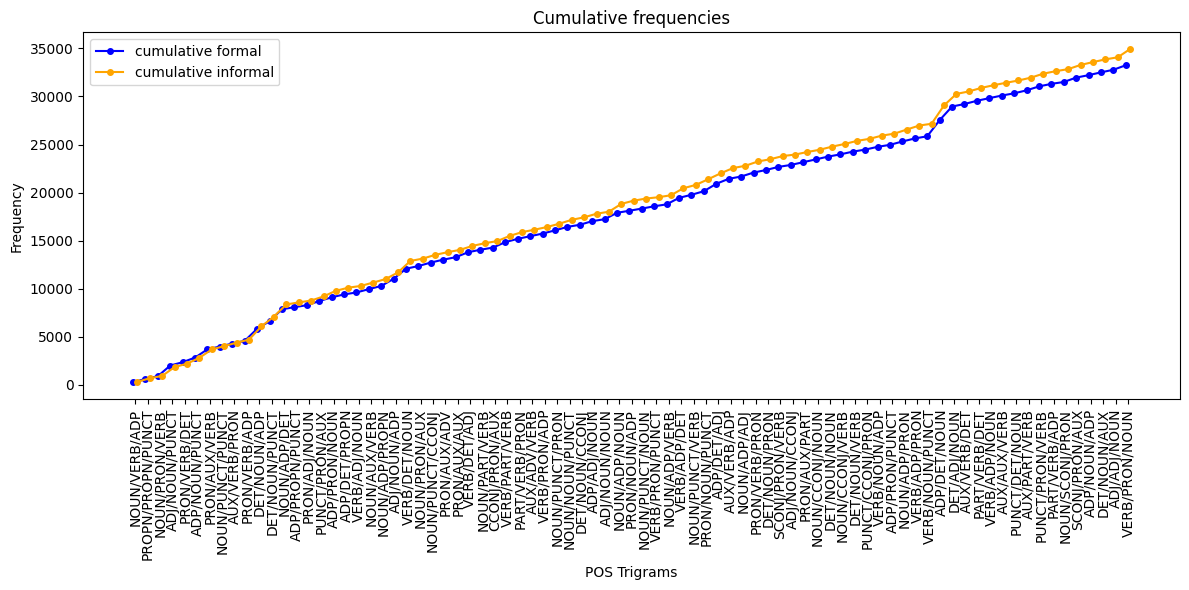

In [23]:
# Calculate cumulative frequencies for both datasets
cumulative_sf_freqs = np.cumsum(filtered_sf_freqs)
cumulative_sif_freqs = np.cumsum(filtered_sif_freqs)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for the first dataset (sf) in blue
# ax.bar(x - width/2, filtered_sf_freqs, width, color='blue', label='formal', alpha=0.7)

# Plot the cumulative histogram for the first dataset (sf) as a line plot
ax.plot(x - width/2, cumulative_sf_freqs, color='blue', linestyle='-', marker='o', label='cumulative formal', markersize=4)

# Plot the bars for the second dataset (sif) in orange
# ax.bar(x + width/2, filtered_sif_freqs, width, color='orange', label='informal', alpha=0.7)

# Plot the cumulative histogram for the second dataset (sif) as a line plot
ax.plot(x + width/2, cumulative_sif_freqs, color='orange', linestyle='-', marker='o', label='cumulative informal', markersize=4)

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(["/".join(trigram) for trigram in filtered_trigram_labels], rotation=90)
ax.set_xlabel("POS Trigrams")
ax.set_ylabel("Frequency")
ax.set_title("Cumulative frequencies")

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

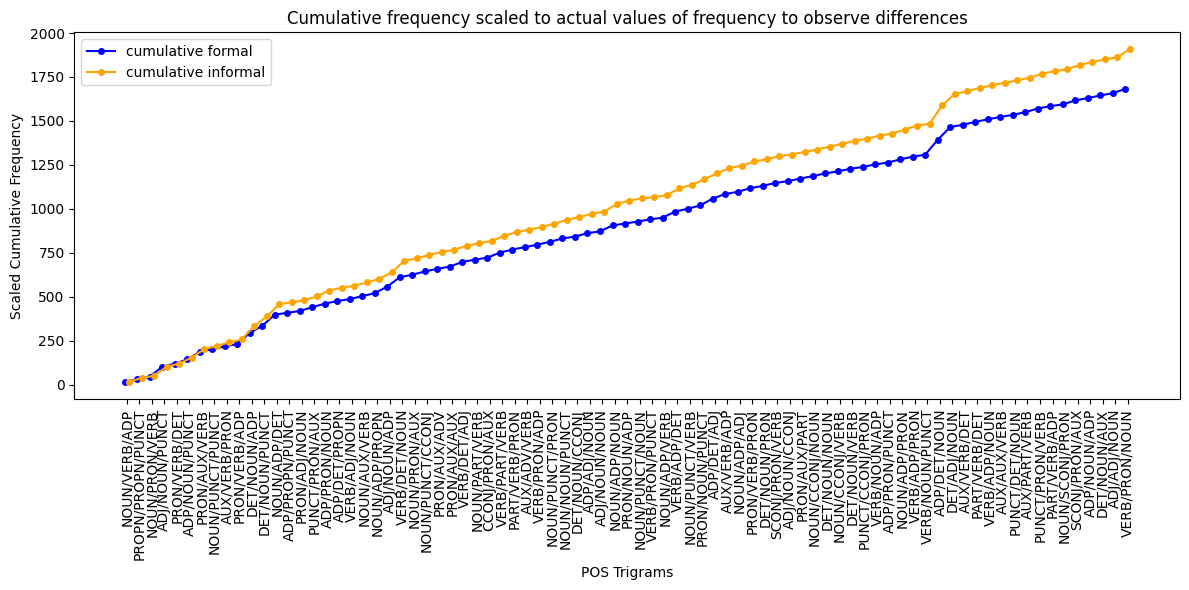

In [22]:
# Calculate cumulative frequencies for both datasets
cumulative_sf_freqs = np.cumsum(filtered_sf_freqs)
cumulative_sif_freqs = np.cumsum(filtered_sif_freqs)

# Normalize the cumulative frequencies by dividing them by their maximum values
max_sfc_freq = max(cumulative_sf_freqs)
max_sifc_freq = max(cumulative_sif_freqs)
normalized_cumulative_sf_freqs = [freq / max_sfc_freq for freq in cumulative_sf_freqs]
normalized_cumulative_sif_freqs = [freq / max_sifc_freq for freq in cumulative_sif_freqs]

max_sf_freq = max(sf_freqs)
max_sif_freq = max(sif_freqs)

# Scale the normalized cumulative values back up by multiplying them by the maximum frequency value
scaled_cumulative_sf_freqs = [freq * max_sf_freq for freq in normalized_cumulative_sf_freqs]
scaled_cumulative_sif_freqs = [freq * max_sif_freq for freq in normalized_cumulative_sif_freqs]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for the first dataset (sf) in blue
# ax.bar(x - width/2, filtered_sf_freqs, width, color='blue', label='formal', alpha=0.7)

# Plot the scaled cumulative values for the first dataset (sf) as a line plot
ax.plot(x - width/2, scaled_cumulative_sf_freqs, color='blue', linestyle='-', marker='o', label='cumulative formal', markersize=4)

# Plot the bars for the second dataset (sif) in orange
# ax.bar(x + width/2, filtered_sif_freqs, width, color='orange', label='informal', alpha=0.7)

# Plot the scaled cumulative values for the second dataset (sif) as a line plot
ax.plot(x + width/2, scaled_cumulative_sif_freqs, color='orange', linestyle='-', marker='o', label='cumulative informal', markersize=4)

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(["/".join(trigram) for trigram in filtered_trigram_labels], rotation=90)
ax.set_xlabel("POS Trigrams")
ax.set_ylabel("Scaled Cumulative Frequency")
ax.set_title("Cumulative frequency scaled to actual values of frequency to observe differences")

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

In [14]:
# Calculate the absolute differences between formal and informal frequencies
differences = [abs(int(sf_freq) - int(sif_freq)) for sf_freq, sif_freq in zip(filtered_sf_freqs, filtered_sif_freqs)]

# Sort trigrams based on differences in descending order
sorted_trigrams_with_differences = sorted(zip(filtered_trigram_labels, filtered_sf_freqs, filtered_sif_freqs, differences), key=lambda x: x[3], reverse=True)

# Define the file path
file_path = 'diff.txt'

# Print and save the sorted distribution in the desired format
with open(file_path, 'w') as file:
    file.write("{:<30} {:<20} {:<20} {:<20}\n".format("Trigram", "Formal Frequency", "Informal Frequency", "Difference"))
    file.write("-" * 85 + '\n')

    for label, sf_freq, sif_freq, diff in sorted_trigrams_with_differences:
        file.write("{:<30} {:<20} {:<20} {:<20}\n".format(str(label), str(int(sf_freq)), str(int(sif_freq)), str(diff)))

print(f"The sorted distribution has been saved to {file_path}")


The sorted distribution has been saved to diff.txt
